In [1]:
import pybamm
import numpy as np
import matplotlib.pyplot as plt
from modified_SPM import modified_SPM

In [2]:
model = modified_SPM()

def current_function(t):
    #return 0.5 * (t < 10) - 0.5 * (t > 10) + 1 * (t > 20.101010) - 1 * (t > 30.101010) + 1 * (t > 40.202020) - 1 * (t > 50.202020)
    return 0.5 * (t < 220) - 0.5 * (t > 220) + 1 * (t > 440) #- 40 * (t > 30) + 40 * (t > 40) - 40 * (t > 50)  

parameter_values = pybamm.ParameterValues(
    {'Ambient temperature [K]': 298.15,
    'Capactior [F]': 38000, 
    'Current function [A]': current_function,
    'Equivalent series resistance in R_0 [Ohm]': 0.0082,
    'Equivalent series resistance in R_1 [Ohm]': 0.0158,
    'Negative electrode thickness [m]': 8.52e-05, 
    'Negative particle radius [m]': 5.86e-06,
    'Nominal cell capacity [A.h]': 5.0,
    'Number of cells connected in series to make a battery': 1.0, 
    'Positive electrode thickness [m]': 7.56e-05,
    'Positive particle radius [m]': 5.22e-06,
    'Separator thickness [m]': 1.2e-05,
    'Particle radius [m]': 10e-6,
    #'Diffusion coefficient [m2.s-1]': 3.9e-14,
    'Diffusion coefficient [m2.s-1]': 3.9e-4,
    'Interfacial current density [A.m-2]': 1.4,
    'Faraday constant [C.mol-1]': 96485,
    'Initial concentration [mol.m-3]': 2.5e4,
    'citations': ['Chen2020']}
)

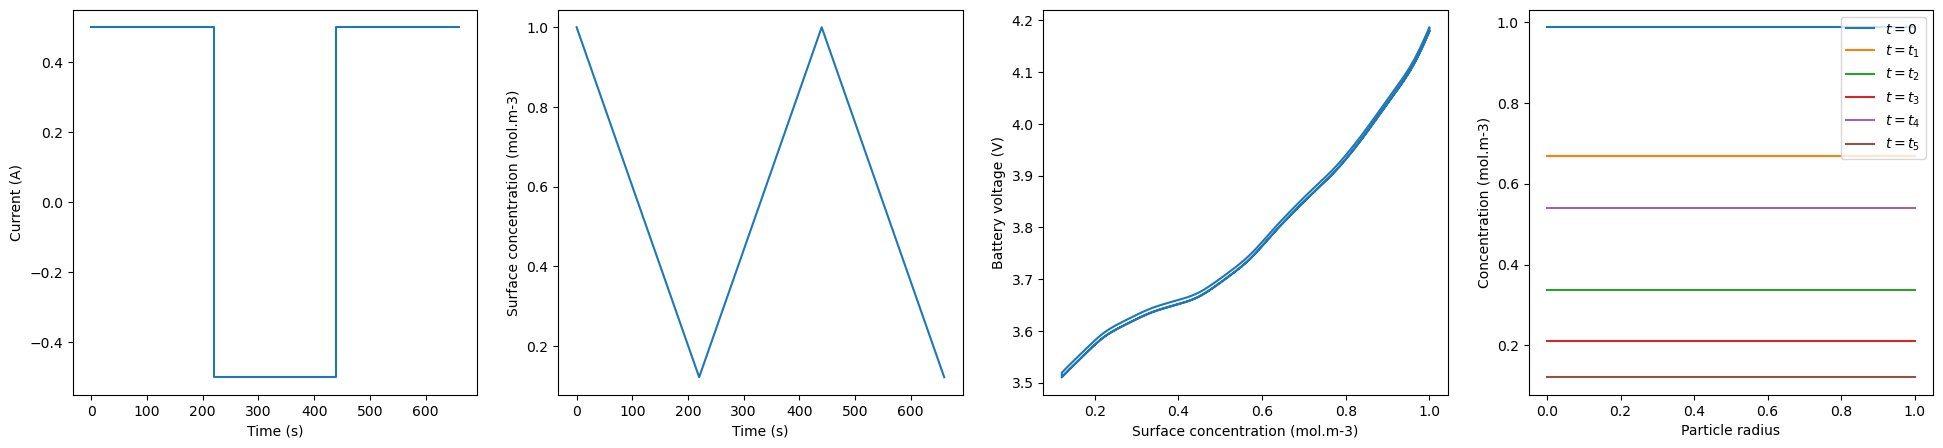

In [3]:
sim = pybamm.Simulation(model, parameter_values=parameter_values)
t_eval = np.linspace(0, 660, 200)
sol = sim.solve(t_eval,calc_esoh=False)

fig, ax = plt.subplots(1, 4, figsize=(24, 5))
t = sol["Time [s]"].data
i = sol["Current variable [A]"].data
V = sol["Battery voltage [V]"].data
# surf_c = sol["Surface concentration [mol.m-3]"].data
c = sol["Concentration [mol.m-3]"].data
r = np.linspace(0, 1, c.shape[0])

ax[0].plot(t, i)
ax[0].set_xlabel("Time (s)")
ax[0].set_ylabel("Current (A)")

ax[1].plot(t, c[-1,:]/c.max())
ax[1].set_xlabel("Time (s)")
ax[1].set_ylabel("Surface concentration (mol.m-3)")

ax[2].plot(c[-1,:]/c.max(), V)
ax[2].set_xlabel("Surface concentration (mol.m-3)")
ax[2].set_ylabel("Battery voltage (V)")

ax[3].plot(r, c[:,1]/c.max(), label="$t = 0$")
ax[3].plot(r, c[:,25]/c.max(), label="$t = t_1$")
ax[3].plot(r, c[:,50]/c.max(), label="$t = t_2$")
ax[3].plot(r, c[:,75]/c.max(), label="$t = t_3$")
ax[3].plot(r, c[:,100]/c.max(), label="$t = t_4$")
ax[3].plot(r, c[:,-1]/c.max(), label="$t = t_5$")
ax[3].set_xlabel("Particle radius")
ax[3].set_ylabel("Concentration (mol.m-3)")

plt.legend(loc='upper right')
plt.show()

Text(0, 0.5, 'Concentration')

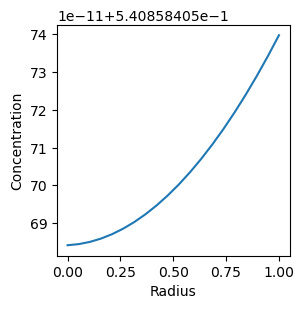

In [4]:
# plot larger figure
r = np.linspace(0, 1, c.shape[0])
fig, (ax1) = plt.subplots(1, 1, figsize=(3, 3))

ax1.plot(r, c[:,100]/c.max())
ax1.set_xlabel("Radius")
ax1.set_ylabel("Concentration")

In [5]:
c.shape

(20, 204)